In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
#### We start by loading the Boston Housing dataset using `pandas.read_csv()`.
##### As the dataset is not available in the sklearn library by default (due to ethical concerns and the inclusion of a racial diversity feature), we source it from somewhere else.  Then, the column names are assigned accordingly for each feature.

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### An explanation of the Boston Housing Dataset:

Each record in the database describes a **Boston suburb or town**. The data was drawn from the **Boston Standard Metropolitan Statistical Area (SMSA) in 1970**. The attributes are defined as follows (taken from the UCI Machine Learning Repository):

### Attributes

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built prior to 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property-tax rate per $10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk−0.63)² where Bk is the proportion of blacks by town.
13. **LSTAT**: Percentage of lower status of the population.
14. **MEDV**: Median value of owner-occupied homes in $1000s.

We can see that the input attributes have a mixture of units.

### To better understand the dataset, we interpret a simpler explanation on our own:

1. **CRIM**: Crime rate in the neighborhood - higher values mean more crime in the area.

2. **ZN**: How much land is zoned for large residential lots - higher values mean more areas allow big houses with yards.

3. **INDUS**: How industrial the area is - higher values mean more factories and businesses instead of homes.

4. **CHAS**: Whether the property is near the Charles River - 1 means yes, 0 means no.

5. **NOX**: Air pollution levels - higher values mean more pollution.

6. **RM**: Average number of rooms in homes - basically how big the houses are.

7. **AGE**: How old the houses are - specifically, what percentage were built before 1940.

8. **DIS**: How far the neighborhood is from employment centers - higher values mean longer commutes to work.

9. **RAD**: How easy it is to access highways - higher values mean better highway access.

10. **TAX**: Property tax rates - how much homeowners pay in taxes.

11. **PTRATIO**: Number of students per teacher in local schools - higher values mean more crowded classrooms.

12. **B**: Diversity metric related to the percentage of Black residents in the area (this feature has been criticized for how it was constructed).

13. **LSTAT**: Percentage of lower-income residents in the area - higher values suggest less affluent neighborhoods.

**Target Variable**:
- **MEDV**: The median home value in thousands of dollars - this is what the dataset is trying to predict based on all the features above.

### We now look at the literal number-related information of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### We can clearly see no null values throughout the dataset, with `CHAS` and `RAD` being the only discrete features.

### Up next, some more basic information on the dataset:

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### We now check if there are any missing values in the dataset:

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As is visible, there are no missing values.

### Up next, we check for duplicated values in the dataset:

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values either.

In [7]:
# Setting an overall theme for the graphs
plt.style.use('dark_background')
sns.set_palette(palette='gnuplot2_r')

### Let's plot a pair-plot using seaborn to get a high-level overview of the entire dataset:

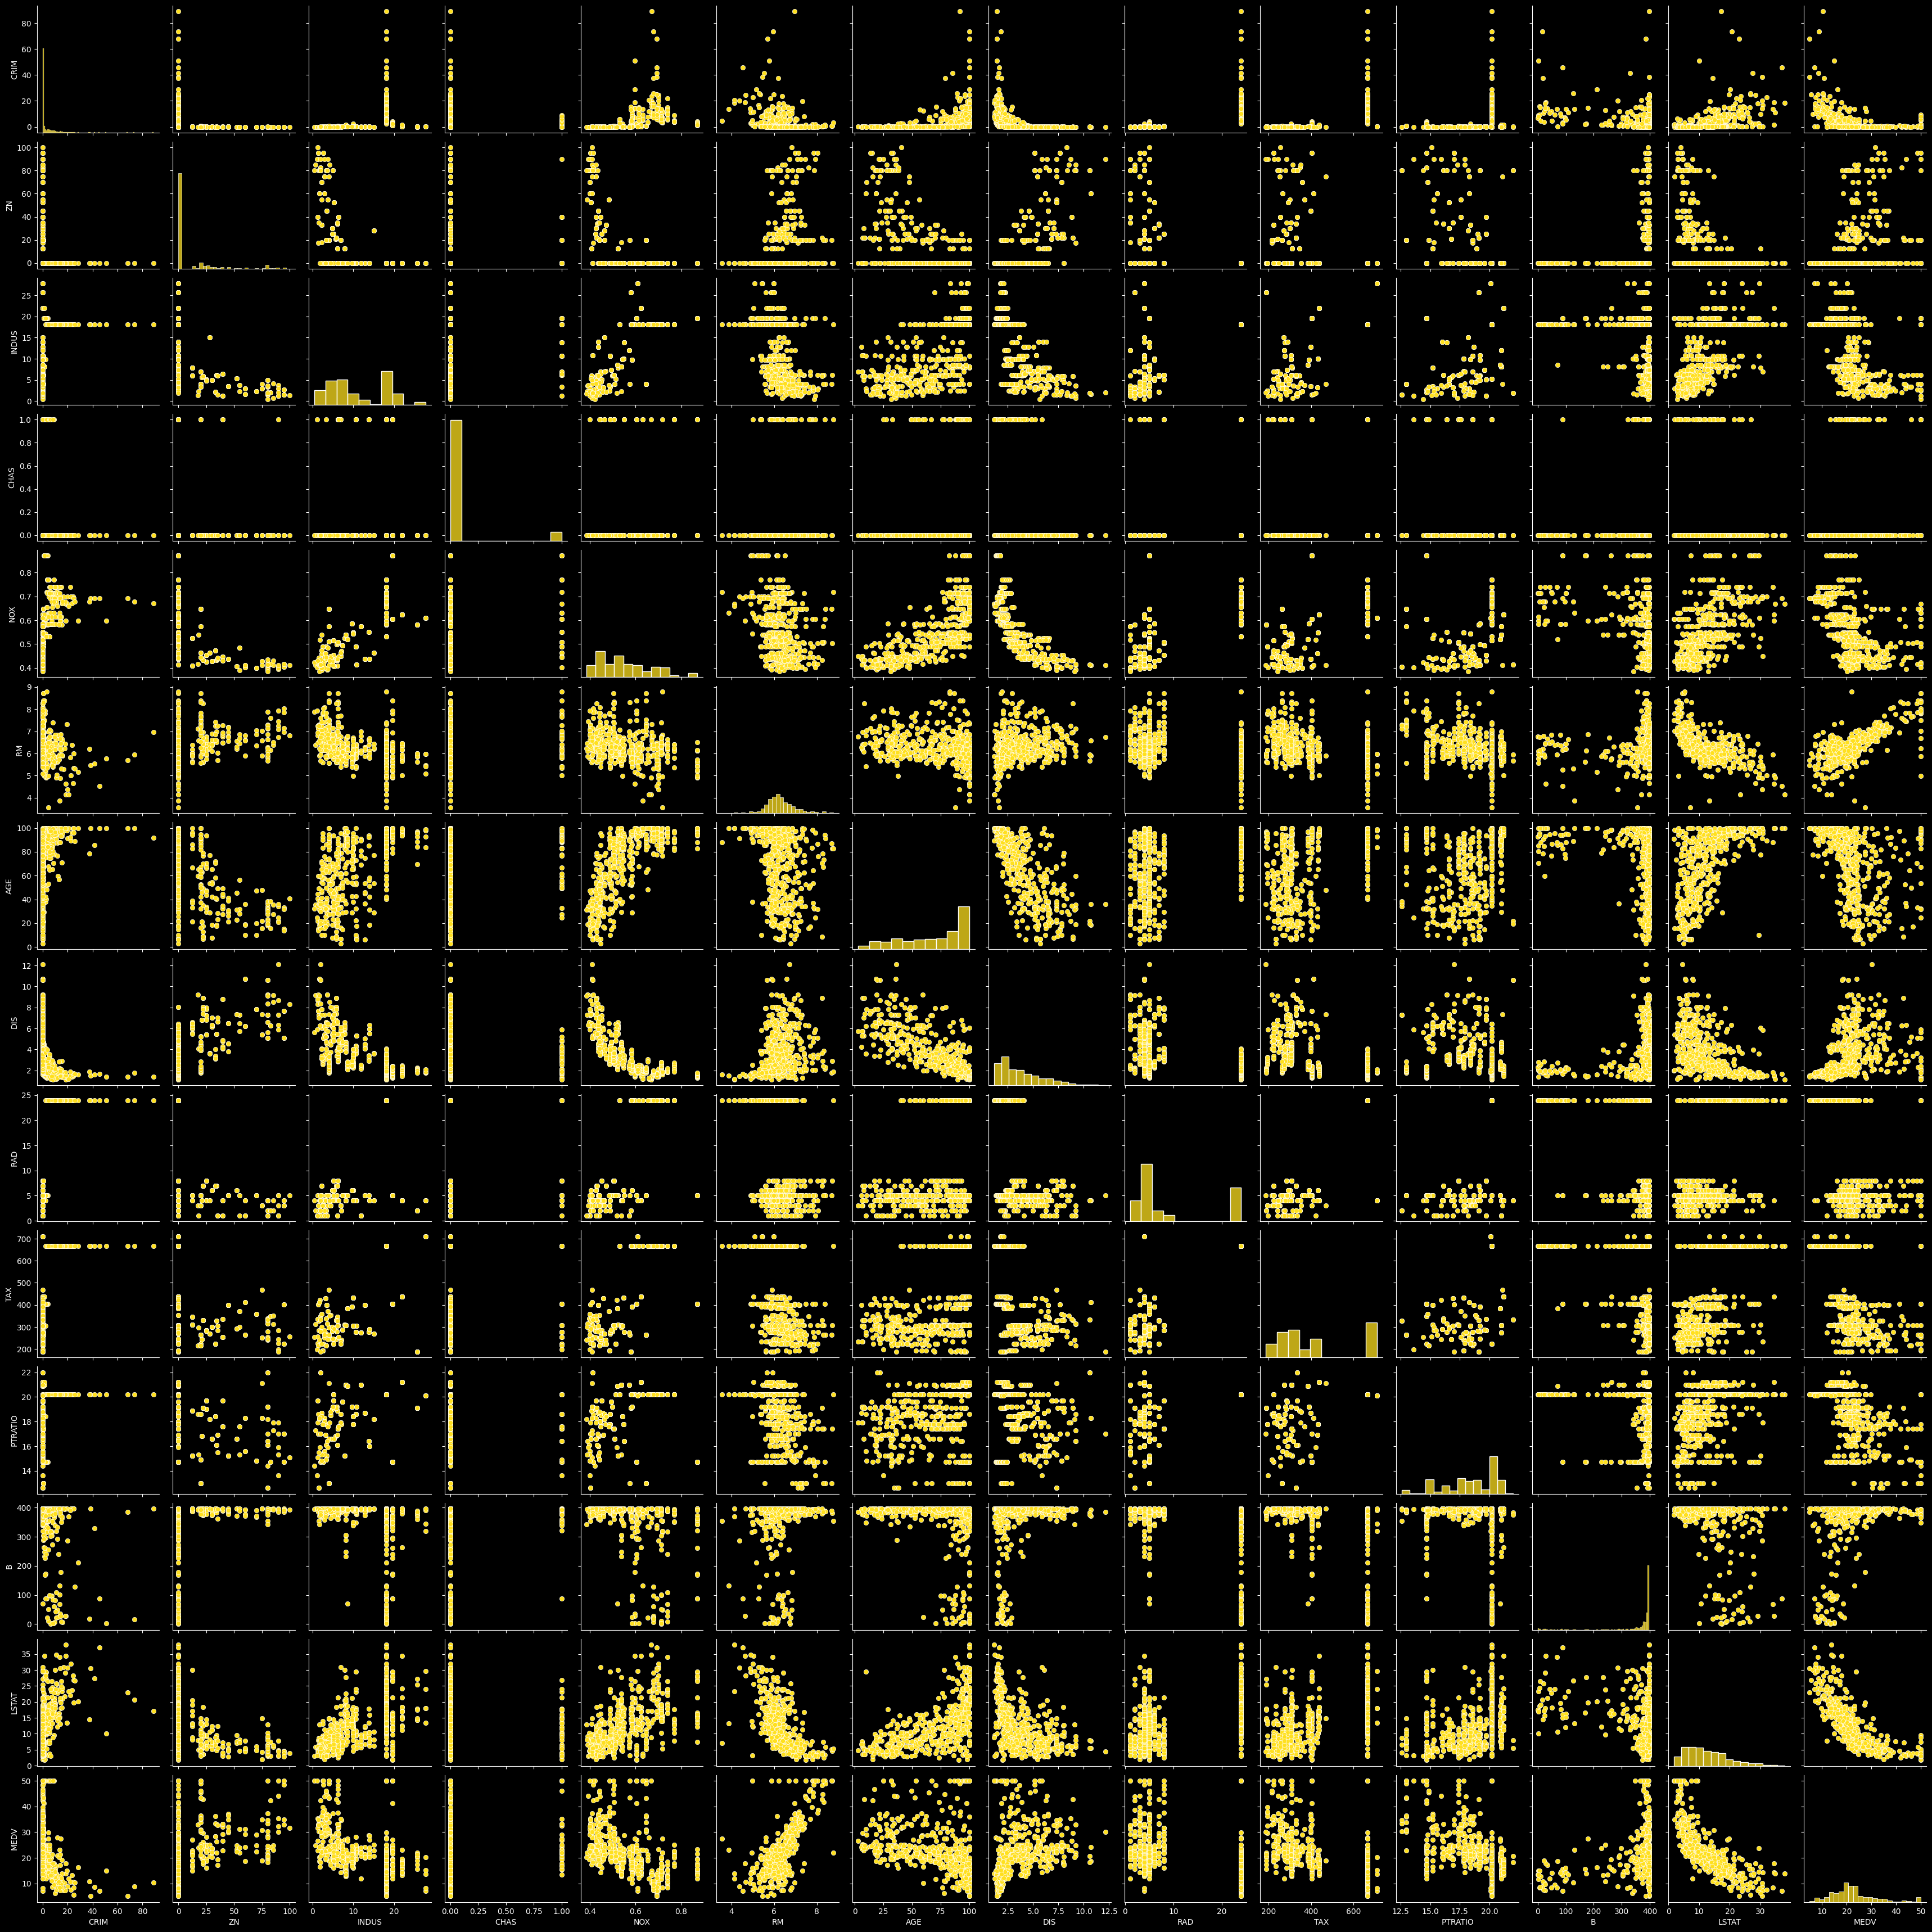

In [8]:
sns.pairplot(df)
plt.savefig('./generated/1.png', dpi=500, bbox_inches='tight')

### The last row is what we want to focus on. It contains all the plots for our target variable. We will plot them separately in a bit.

### First, let's visualize the distribution of the target variable `MEDV` to understand its spread and skewness.

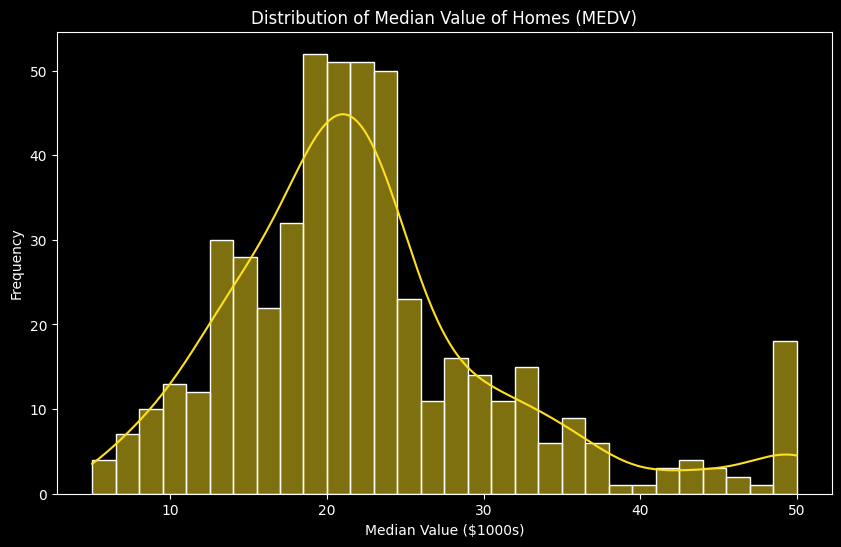

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of Median Value of Homes (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')
plt.savefig('./generated/2.png', dpi=500, bbox_inches='tight')
plt.show()

### Analysis:
- The distribution is **right-skewed**, meaning most homes are valued on the **lower to mid range**.
- The **peak occurs around $20,000 to $25,000**, where most homes are priced.
- There is a noticeable **spike at $50,000**, likely due to **capped values** in the dataset (a known characteristic of this dataset).
- The long tail toward the right indicates some **high-value homes**, but they are relatively rare.

This skewness may influence models that assume normality (e.g., Linear Regression), so **transformation or robust models** might help.

### We will now plot all the correlated features with the target to observe their individual relationships with `MEDV`.

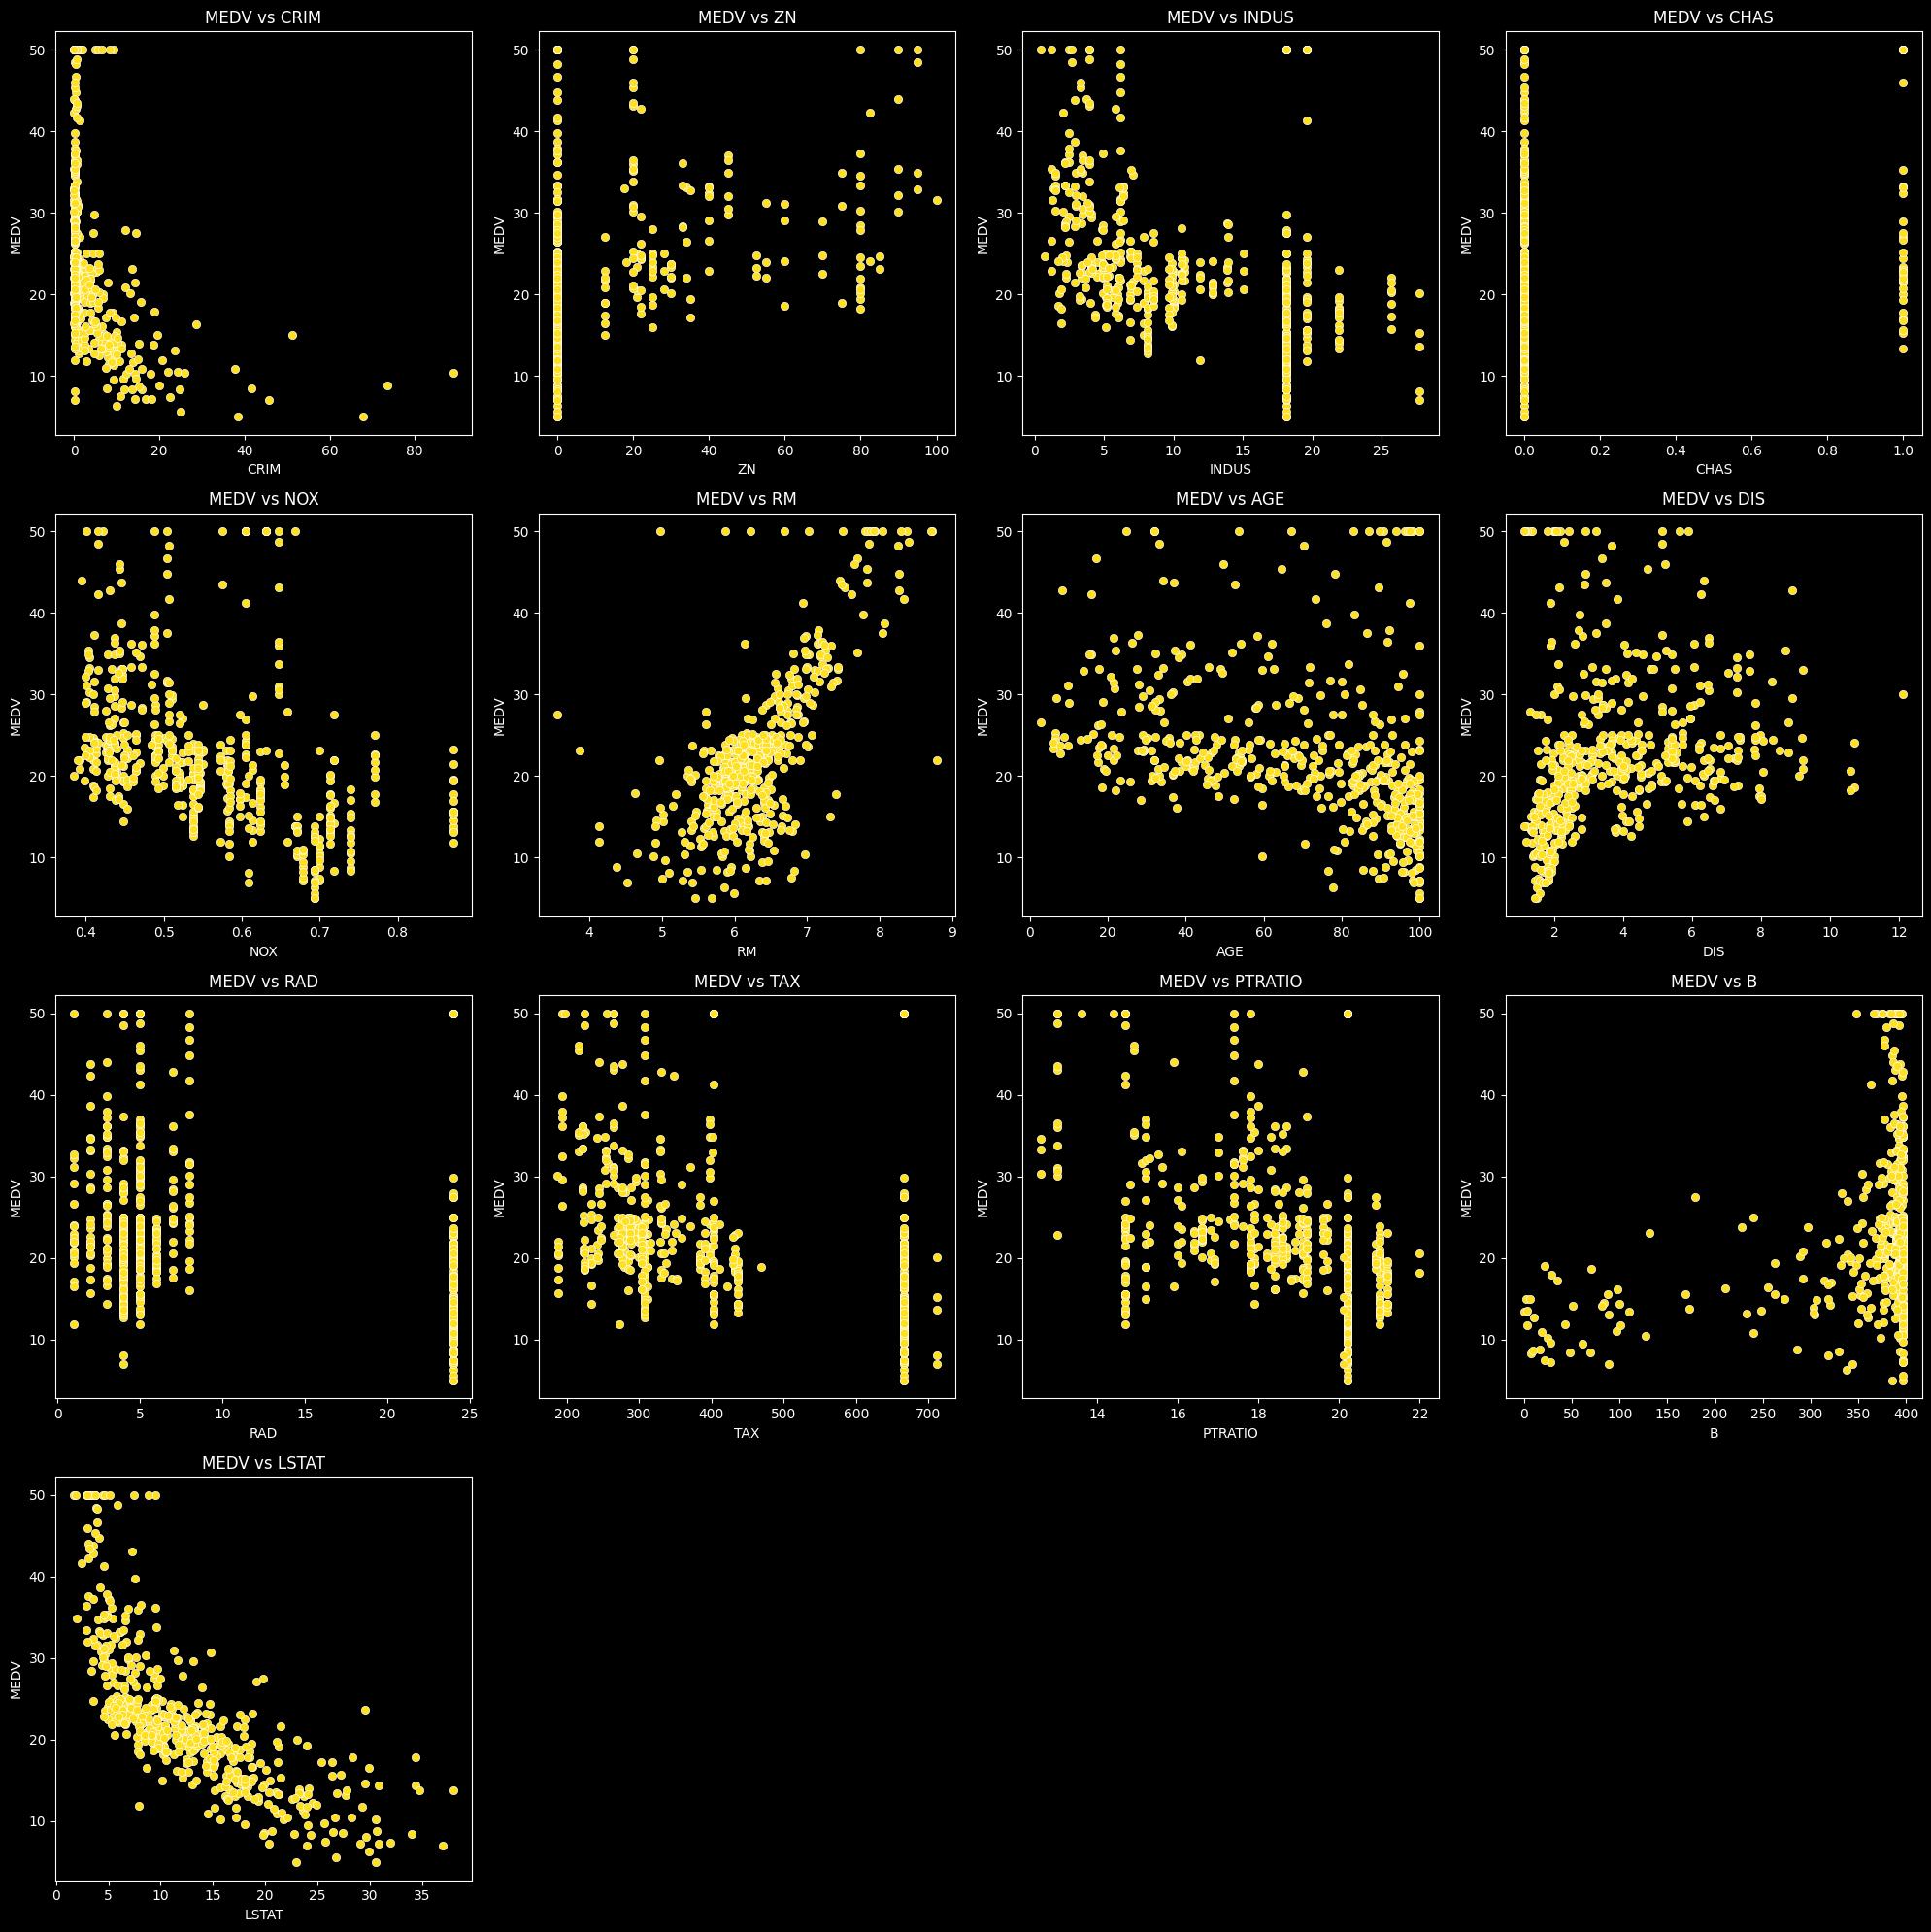

In [10]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=df[column], y=df['MEDV'])
    plt.title(f'MEDV vs {column}')
    plt.xlabel(column)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.savefig('./generated/3.png', dpi=500, bbox_inches='tight')
plt.show()

### While obvious correlations can be seen between `MEDV` and `CRIM`, `RM`, `DIS`, and `LSTAT`, we will use the correlation matrix below to properly breakdown each correlation to our target feature.


### The heatmap below shows correlations between all features and the target variable. It will help us in identifying important predictors.

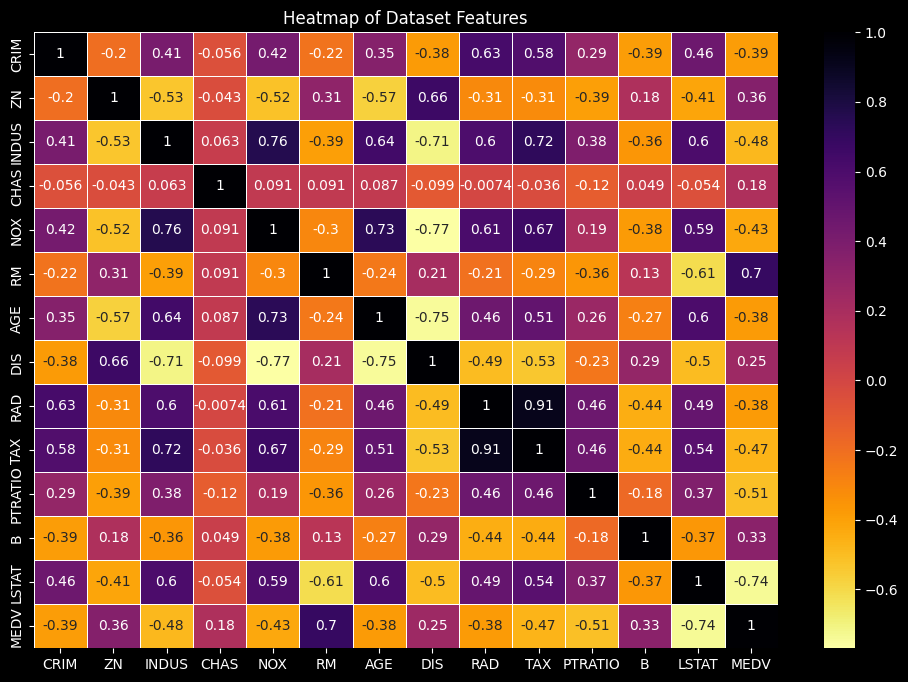

In [11]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='inferno_r', linewidths=0.5)
plt.title('Heatmap of Dataset Features')
plt.savefig('./generated/4.png', dpi=500, bbox_inches='tight')
plt.show()

### The main feature to predict is **MEDV (The median value of the home)**. For this feature, let's break down the relationship with other features:

#### - **RM** (The average number of Rooms in a House) ~ 0.7 (Strong positive correlation):
This suggestz that as the average number of rooms in a house goes up, the value of the home goes up too.

#### - **ZN** (Big houses allowed to have yards) ~ 0.36 (Positive Correlation):
The more the area that allows bigger houses, the more expensive the homes are.

#### - **B** (Diversity Metric/Number of Black residents in the area [Prone to criticism]) ~ 0.33 (Positive correlation):
The more the diversity of an area, the more expensive the homes are.

#### - **DIS** (How long it takes to commute) ~ 0.25 (Positive Correlation):
The further away we get from institutions, the more expensive the homes become.

#### - **CHAS** (If the property is near Charles River) ~ 0.18 (Positive Correlation):
A chance that if it is closer, the homes are more expensive.

#### - **LSTAT** (As discussed previously, we will use this as a metric for area wealth. The lower, the richer) ~ -0.74 (Strong negative correlation):
As the area becomes more affluent (LSTAT decreases), the value of homes go up.

#### - **PTRATIO** (Also discussed previously, this will be a metric of more students being present in an area, which means lower income) ~ -0.51 (Negative correlation):
As the number of students in an area goes up, the value of homes decrease.

#### - **INDUS** (How industrial an area is, so higher values mean less homes) ~ -0.48 (Negative correlation):
The more industrial an area is, the cheaper the homes are.

#### - **TAX** (Tax Rate) ~ -0.47 (Negative correlation):
As tax rate goes up, the values of homes go down.

#### - **NOX** (Air pollution levels) ~ -0.43 (Negative correlation):
As air pollution level goes up, the values of homes go down.

#### - **CRIM** (Crime Rate in Neighborhood) ~ -0.39 (Negative correlation):
As the crime rate goes up, the values of homes go down.

#### - **RAD** (How easy it is to access highways) ~ -0.38 (Negative correlation):
The easier it is to access the highway, the cheaper the homes are at that location.

#### - **AGE** (How old the houses are/what percentage was build before 1940) ~ -0.38 (Negative correlation):
A high value of this means older houses in that area, which means cheaper homes.

### We will now split the dataset into training (70%) and test (30%) sets for evaluation.

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### To start off, let's train a Linear Regression model using the training data.

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### We will now use the trained Linear Regression model to make predictions on the test set.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adj_r2:.3f}")

MAE: 3.16
MSE: 21.52
RMSE: 4.64
R²: 0.711
Adjusted R²: 0.684


### What do these results mean?

- **MAE (3.16)**: On average, the model's predictions are off by ~$3,160.
- **MSE (21.52)** and **RMSE (4.64)**: These indicate moderate variance in errors, with RMSE showing the typical prediction error is ~$4,640.
- **R² (0.711)**: About **71.1% of the variance** in home values is explained by the model — decent but not exceptional.
- **Adjusted R² (0.684)**: Slightly lower due to the number of features, suggesting some may be weak predictors.

To conclude, the model does reasonably well, but there’s **room for improvement** — we will try different models after trying to optimize this dataset by feature scaling.

### But first, let's see the magnitude of coefficients so we can get an idea of feature importance.

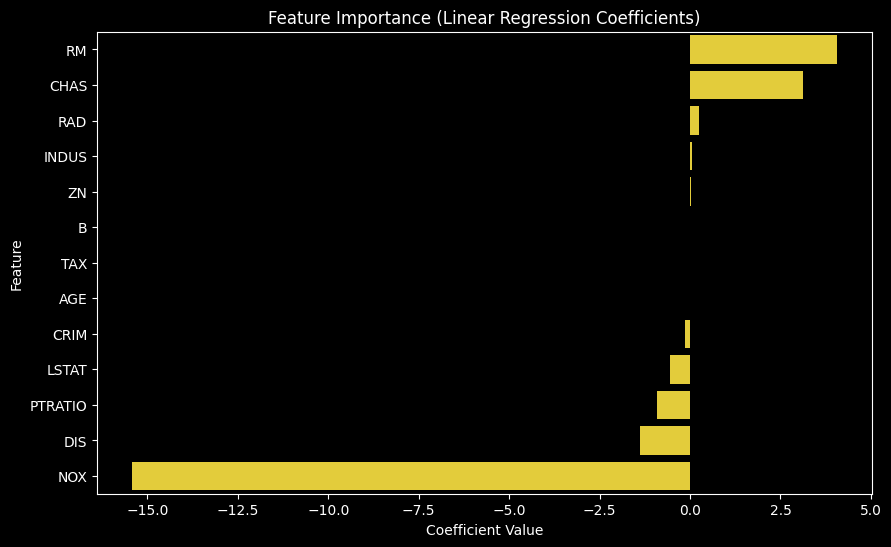

In [15]:
# Coefficients from the linear regression model
importance = pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.savefig('./generated/5.png', dpi=500, bbox_inches='tight')
plt.show()

This bar chart shows how each feature affects the predicted **Median Value of Homes (MEDV)**:

- **RM (Average number of rooms per dwelling)**: Strongest **positive impact** — more rooms → higher house value.
- **CHAS (Charles River proximity)**: Also positive — homes near the river tend to be more valuable.

- **NOX (Nitric Oxides concentration)**: Strongest **negative impact** — more pollution → lower house value.
- **DIS (Distance to employment centers)** and **PTRATIO (Pupil-Teacher Ratio)**: Slightly negative — farther distance or larger class sizes → lower prices.
- **LSTAT (Lower status population %)**: Negative correlation — higher LSTAT → lower home value.

- Features like **RAD**, **INDUS**, **ZN**, and **B** have coefficients close to zero, implying they have little to no linear effect on `MEDV` in this model.

Linear regression interprets RM and NOX as the most influential features. However, real-world housing prices may have **non-linear relationships**, which tree-based models like Random Forest may capture better.

### Let us now try Feature Scaling to standardize features using `StandardScaler`.

In [16]:
from sklearn.preprocessing import StandardScaler

# Scale features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Let's train the linear Regression model on the scaled data:

In [17]:
# Train Linear Regression on scaled data
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [18]:
# Evaluation metrics on scaled data
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
adj_r2_scaled = 1 - (1 - r2_scaled) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Linear Regression (Scaled) Metrics:")
print(f"MAE: {mae_scaled:.2f}")
print(f"MSE: {mse_scaled:.2f}")
print(f"RMSE: {rmse_scaled:.2f}")
print(f"R²: {r2_scaled:.3f}")
print(f"Adjusted R²: {adj_r2_scaled:.3f}")

Linear Regression (Scaled) Metrics:
MAE: 3.16
MSE: 21.52
RMSE: 4.64
R²: 0.711
Adjusted R²: 0.684


- **MAE: 3.16**, **MSE: 21.52**, **RMSE: 4.64**
- **R²: 0.711**, **Adjusted R²: 0.684**

- These metrics are **identical to unscaled Linear Regression**, indicating that **scaling had no effect**.
- This makes sense because:
  - **Linear Regression is not sensitive to feature scales** unless regularization is applied (e.g. Ridge/Lasso).
  - No regularization was used here, so results remain the same.

Scaling is helpful for **regularized models**, but for plain Linear Regression, it **doesn’t impact performance**.

### Let us try polynomial regression to see if the results improve.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use polynomial features of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions & new metrics
poly_pred = poly_model.predict(X_test)

poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, poly_pred)
poly_adj_r2 = 1 - (1 - poly_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Polynomial Regression Metrics:")
print(f"MAE: {poly_mae:.2f}")
print(f"MSE: {poly_mse:.2f}")
print(f"RMSE: {poly_rmse:.2f}")
print(f"R²: {poly_r2:.3f}")
print(f"Adjusted R²: {poly_adj_r2:.3f}")

Polynomial Regression Metrics:
MAE: 3.06
MSE: 25.26
RMSE: 5.03
R²: 0.661
Adjusted R²: 0.629


- **MAE: 3.06**  
  Very close to the Linear Regression MAE (3.16), indicating similar average error.

- **MSE: 25.26** and **RMSE: 5.03**  
  Slightly worse than Linear Regression (MSE: 21.52, RMSE: 4.64), suggesting increased variance in predictions.

- **R²: 0.661** and **Adjusted R²: 0.629**  
  **Lower** than Linear Regression (R²: 0.711), meaning the model explains **less variance** in the target variable despite being more complex.

Adding polynomial features **did not improve performance** — in fact, it slightly degraded it.  
This could mean:
- The data has a **mostly linear relationship**.
- Adding many polynomial terms **introduced noise** and potential overfitting.
- A global polynomial model doesn't suit the data's complexity.

### We will now try Lasso Regression (L1 regularization).

In [20]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Lasso Regression Metrics:")
print(f"MAE: {lasso_mae:.2f}")
print(f"MSE: {lasso_mse:.2f}")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R²: {lasso_r2:.3f}")
print(f"Adjusted R²: {lasso_adj_r2:.3f}")

Lasso Regression Metrics:
MAE: 3.21
MSE: 22.79
RMSE: 4.77
R²: 0.694
Adjusted R²: 0.665


- **MAE: 3.21**  
  Slightly higher than plain linear regression (3.16) — predictions are, on average, ~$3,210 off.

- **MSE: 22.79**, **RMSE: 4.77**  
  Again, marginally worse than linear regression (MSE: 21.52, RMSE: 4.64), indicating a small increase in average error.

- **R²: 0.694**, **Adjusted R²: 0.665**  
  Slight decrease from linear regression (R²: 0.711), showing that Lasso explained **less variance**.

- **Lasso didn’t improve performance** in this case.
- Lasso helps when some features are **irrelevant or highly correlated**, but here:
  - The features are already well-optimized.
  - There's no strong benefit from shrinking coefficients.

Lasso can help with feature selection in high-dimensional or noisy datasets, but here, it slightly hurt performance. **Standard Linear Regression or Random Forest** still perform better.

### Let's now try Ridge Regression (L2 regularization).

In [21]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Ridge Regression Metrics:")
print(f"MAE: {ridge_mae:.2f}")
print(f"MSE: {ridge_mse:.2f}")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R²: {ridge_r2:.3f}")
print(f"Adjusted R²: {ridge_adj_r2:.3f}")

Ridge Regression Metrics:
MAE: 3.16
MSE: 21.55
RMSE: 4.64
R²: 0.711
Adjusted R²: 0.684


- **MAE: 3.16**, **MSE: 21.55**, **RMSE: 4.64**
- **R²: 0.711**, **Adjusted R²: 0.684**

- The metrics are **identical to basic Linear Regression** (and scaled version), meaning:
  - **Ridge didn’t improve performance**, but didn’t hurt it either.
  - This indicates that **overfitting was not a major issue**, so regularization wasn't needed.
  - The dataset likely doesn't contain enough noise or multicollinearity to benefit from Ridge at this alpha value.

Ridge Regression performs **just as well** as standard Linear Regression in this case, which is good.  
It means your model is already well-fitted, and there's **no gain** from penalizing large coefficients.

### Let's try a Decision Tree Regressor to see how it performs:

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_adj_r2 = 1 - (1 - dt_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Decision Tree Regressor Metrics:")
print(f"MAE: {dt_mae:.2f}")
print(f"MSE: {dt_mse:.2f}")
print(f"RMSE: {dt_rmse:.2f}")
print(f"R²: {dt_r2:.3f}")
print(f"Adjusted R²: {dt_adj_r2:.3f}")


Decision Tree Regressor Metrics:
MAE: 2.46
MSE: 10.83
RMSE: 3.29
R²: 0.855
Adjusted R²: 0.841


- **MAE: 2.46**  
  Best so far — predictions are, on average, off by only ~$2,460.

- **MSE: 10.83**, **RMSE: 3.29**  
  Significantly lower than all linear models — shows much smaller average squared error.

- **R²: 0.855**, **Adjusted R²: 0.841**  
  Explains **~85.5%** of the variance in home prices — a **strong improvement** over Linear, Ridge, and Lasso models (~71%).

- The Decision Tree model **captures complex, non-linear patterns** in the data that linear models miss.
- It gives much better accuracy **without needing feature scaling or transformations**.

This model outperforms all previous models — both in error metrics and R².  
It confirms that **non-linear relationships** exist in the dataset, making tree-based models like this a better fit.

### Finally, let's try a Random Forest Regressor to see if it performs any better:

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_adj_r2 = 1 - (1 - rf_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Random Forest Regressor Metrics:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.3f}")
print(f"Adjusted R²: {rf_adj_r2:.3f}")


Random Forest Regressor Metrics:
MAE: 2.10
MSE: 9.71
RMSE: 3.12
R²: 0.870
Adjusted R²: 0.857


- **MAE: 2.10**  
  Lowest so far — predictions are, on average, just ~$2,100 off.

- **MSE: 9.71**, **RMSE: 3.12**  
  Better than all previous models — lowest error variance, indicating high accuracy.

- **R²: 0.870**, **Adjusted R²: 0.857**  
  Explains **87% of the variance** in home values — the **highest** among all models.

- **Best overall performance** in terms of both error and variance explained.
- Handles **non-linear relationships and interactions** very well, unlike linear models.
- Built-in averaging across many trees also **reduces overfitting** compared to a single Decision Tree.

The **Random Forest Regressor** is clearly the best-performing model on this dataset.  
It strikes the ideal balance between **accuracy and generalization**, making this a **strong final choice**.

### Now, let us compare the R² scores for all the models.

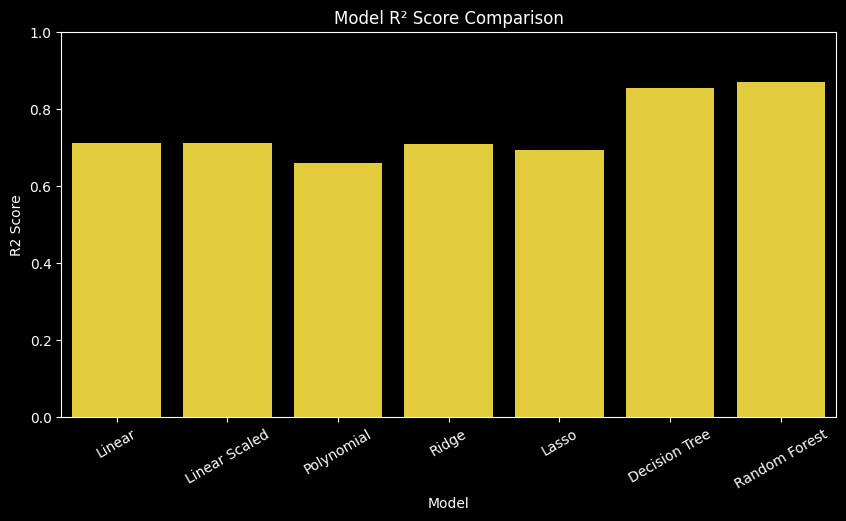

In [24]:
# Compare all models' R²
model_scores = pd.DataFrame({
    'Model': ['Linear', 'Linear Scaled', 'Polynomial', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2, r2_scaled, poly_r2, ridge_r2, lasso_r2, dt_r2, rf_r2]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2 Score', data=model_scores)
plt.title("Model R² Score Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.savefig('./generated/3.png', dpi=500, bbox_inches='tight')
plt.show()

### As can be seen, the Random Forest Regressor performs the best.
#### A report PDF has been attached with this notebook, summarizing the findings in this notebook.

# ADDITIONAL NOVELTY:

## RegressoBot: Interactive Chat Assistant

To enhance the interactivity and demonstrate a deeper understanding of the regression analysis, a chatbot named **RegressoBot** was developed and integrated into a custom web interface.

### Key Features:
- Built with **LLaMA 3.2** using **Ollama** to serve a local language model.
- Fine-tuned system prompt makes it behave like a teaching assistant for regression.
- Answers natural language questions on:
  - Model metrics (MAE, RMSE, R², Adjusted R²)
  - Feature importance
  - Model selection and improvement techniques
  - Dataset insights

### Technologies Used:
- **Frontend**: HTML + JavaScript (chat UI)
- **Backend**: Ollama serving a locally hosted model
- **Local API**: `http://localhost:11434/api/generate`

View the Demo at:  
# [Adib's 445 Repo](https://github.com/rajin-khan/machine-learning-sem10/tree/main/assignments/Assignment2/website)

This bot adds a practical, interactive layer to the assignment — blending machine learning concepts with modern AI deployment.
More details in the report PDF.
